### 분류모델 평가

In [84]:
from sklearn.base import BaseEstimator
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import numpy as np
import pandas as pd

# 분류기 1
class MyDummyClassifier(BaseEstimator):
    def fit(self, X, y = None):
        pass

    def predict(self, X):
        pred = np.zeros((X.shape[0]))
        for i in range(X.shape[0]): # sex == 1, survived는 0으로 예측, 아니면 survived를 1로 예측
            if X['Sex'].iloc[i] == 1:
                pred[i] = 0
            else:
                pred[i] = 1

        return pred

In [85]:
from sklearn.preprocessing import LabelEncoder

# Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return df

# 머신러닝 알고리즘에 불필요한 피처 제거
def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return df

# 레이블 인코딩 수행.
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 앞에서 설정한 데이터 전처리 함수 호출
def transform_features(df):
    df = fillna(df) # 결측치 처리
    df = drop_features(df) # 불필요한 컬럼 삭제
    df = format_features(df) # 레이블 인코딩
    return df

In [86]:
# data load
titanic_df = pd.read_csv('../data/titanic_train.csv')

y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis = 1)

# 전처리
X_titanic_df = transform_features(X_titanic_df)

# 데이터 셋 분할
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df
                                                    , y_titanic_df
                                                    , test_size = 0.2
                                                    , random_state=0)

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_22244\2134195619.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_22244\2134195619.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beh

In [87]:
# 모델 생성 및 학습

my_clf = MyDummyClassifier()
my_clf.fit(X_train, y_train)

In [88]:
my_pred =my_clf.predict(X_test)
accuracy_score(y_test, my_pred)

0.7877094972067039

In [89]:
# 정밀도(precision_score) 및 재현율(recall_score)
from sklearn.metrics import precision_score, recall_score

# 예측이 양성인것의 정밀도 및 실제값이 양성인거 중에 정답
precision_score(y_test, my_pred), recall_score(y_test, my_pred)

(0.7313432835820896, 0.7101449275362319)

### MNIST dataset - 손글씨 데이터 셋
149페이지의 MyFakeClassfier를 이용한 정확도 측정 직접 해보기

### 오차행렬

In [91]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, my_pred) #row : 실제값, col ; 예측

array([[92, 18],
       [20, 49]])

In [45]:
X_train, X_test, y_train, y_test = \
train_test_split(X_titanic_df
                 , y_titanic_df
                 , test_size = 0.2
                 , random_state = 11)


In [55]:
# p.156
def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)

    print(confusion)
    print(f"{'*'*10}")
    print(accuracy)
    print(f"{'*'*10}")
    print(precision)
    print(f"{'*'*10}")
    print(recall)
    print(f"{'*'*10}")

In [56]:
# 로지스틱 회귀 분류 모델 생성
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)

pred = lr_clf.predict(X_test)
pred

# 정확도, 정밀도, 재현율 확인
get_clf_eval(y_test, pred)

[[104  14]
 [ 13  48]]
**********
0.8491620111731844
**********
0.7741935483870968
**********
0.7868852459016393
**********


c:\Users\YJ\.conda\envs\ml_env\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [58]:
pred_proba = lr_clf.predict_proba(X_test)
pred_proba

array([[0.46188156, 0.53811844],
       [0.87872005, 0.12127995],
       [0.8772055 , 0.1227945 ],
       [0.88263006, 0.11736994],
       [0.8552287 , 0.1447713 ],
       [0.88224575, 0.11775425],
       [0.88845999, 0.11154001],
       [0.20879267, 0.79120733],
       [0.78286569, 0.21713431],
       [0.36936812, 0.63063188],
       [0.89980876, 0.10019124],
       [0.87502596, 0.12497404],
       [0.87719951, 0.12280049],
       [0.88841404, 0.11158596],
       [0.43663791, 0.56336209],
       [0.85903129, 0.14096871],
       [0.90373534, 0.09626466],
       [0.73346434, 0.26653566],
       [0.72472068, 0.27527932],
       [0.1717849 , 0.8282151 ],
       [0.75363842, 0.24636158],
       [0.61908873, 0.38091127],
       [0.85467041, 0.14532959],
       [0.81478629, 0.18521371],
       [0.88804303, 0.11195697],
       [0.76554446, 0.23445554],
       [0.85967787, 0.14032213],
       [0.92588408, 0.07411592],
       [0.71963981, 0.28036019],
       [0.6954562 , 0.3045438 ],
       [0.

In [62]:
pred_proba_result = \
np.concatenate([pred_proba, pred.reshape(-1,1)]
               , axis = 1)

pred_proba_result

array([[0.46188156, 0.53811844, 1.        ],
       [0.87872005, 0.12127995, 0.        ],
       [0.8772055 , 0.1227945 , 0.        ],
       [0.88263006, 0.11736994, 0.        ],
       [0.8552287 , 0.1447713 , 0.        ],
       [0.88224575, 0.11775425, 0.        ],
       [0.88845999, 0.11154001, 0.        ],
       [0.20879267, 0.79120733, 1.        ],
       [0.78286569, 0.21713431, 0.        ],
       [0.36936812, 0.63063188, 1.        ],
       [0.89980876, 0.10019124, 0.        ],
       [0.87502596, 0.12497404, 0.        ],
       [0.87719951, 0.12280049, 0.        ],
       [0.88841404, 0.11158596, 0.        ],
       [0.43663791, 0.56336209, 1.        ],
       [0.85903129, 0.14096871, 0.        ],
       [0.90373534, 0.09626466, 0.        ],
       [0.73346434, 0.26653566, 0.        ],
       [0.72472068, 0.27527932, 0.        ],
       [0.1717849 , 0.8282151 , 1.        ],
       [0.75363842, 0.24636158, 0.        ],
       [0.61908873, 0.38091127, 0.        ],
       [0.

In [63]:
# 160 페이지 바이너라이저 
# 이진화 : 임계값을 기준으로 0 OR 1 값이 더 큰 것 기준으로 판정
custom_threshold = 0.4
pred_proba_1 = pred_proba[:,1].reshape(-1,1) # 새로운 예측값
pred_proba_1

array([[0.53811844],
       [0.12127995],
       [0.1227945 ],
       [0.11736994],
       [0.1447713 ],
       [0.11775425],
       [0.11154001],
       [0.79120733],
       [0.21713431],
       [0.63063188],
       [0.10019124],
       [0.12497404],
       [0.12280049],
       [0.11158596],
       [0.56336209],
       [0.14096871],
       [0.09626466],
       [0.26653566],
       [0.27527932],
       [0.8282151 ],
       [0.24636158],
       [0.38091127],
       [0.14532959],
       [0.18521371],
       [0.11195697],
       [0.23445554],
       [0.14032213],
       [0.07411592],
       [0.28036019],
       [0.3045438 ],
       [0.9472626 ],
       [0.8173176 ],
       [0.12686974],
       [0.82608572],
       [0.39952262],
       [0.23445554],
       [0.07237074],
       [0.61107743],
       [0.05294111],
       [0.10388153],
       [0.35076032],
       [0.08332046],
       [0.82175202],
       [0.70782307],
       [0.63045415],
       [0.63047046],
       [0.91887858],
       [0.358

In [66]:
from sklearn.preprocessing import Binarizer

binarizer = Binarizer(threshold = custom_threshold).fit(pred_proba_1) #새로운 예측값으로 이진화한 예측값
custom_predict = binarizer.transform(pred_proba_1)
custom_predict

print(f"{'*'*20}")
print(f"새로운 값")
print(get_clf_eval(y_test, custom_predict))

print(f"{'*'*20}")
print(f"이전 값")
print(get_clf_eval(y_test, pred))

print('정밀도와 재현율이 trade-off(상충관계)임을 파악할 수 있다')

********************
새로운 값
[[98 20]
 [10 51]]
**********
0.8324022346368715
**********
0.7183098591549296
**********
0.8360655737704918
**********
None
********************
이전 값
[[104  14]
 [ 13  48]]
**********
0.8491620111731844
**********
0.7741935483870968
**********
0.7868852459016393
**********
None
정밀도와 재현율이 trade-off(상충관계)임을 파악할 수 있다


### f1-score
재현율과 정밀도의 조화 평균 : 그 모델의 전체적인 성능을 볼 때

In [68]:
from sklearn.metrics import f1_score

f1_score(y_test, custom_predict), f1_score(y_test, pred)

(0.7727272727272727, 0.7804878048780488)

### ROC (Receiver Operation Characteristics)

- 민감도 어떻게 달라지는지 보는 지표 (=재현율, 실제 양성을 맞춘 비율)
- 거짓긍정율 = 1 - 특이도
- 좌측 상단 1에 가까울 수록 좋은 모델
- ROC-AUC : ROC 곡선 아래 면적의 값, 면적이 클 수록 좋은 모델

In [72]:
pred_proba_class1 = lr_clf.predict_proba(X_test)[:, 1]
pred_proba_class1

array([0.53811844, 0.12127995, 0.1227945 , 0.11736994, 0.1447713 ,
       0.11775425, 0.11154001, 0.79120733, 0.21713431, 0.63063188,
       0.10019124, 0.12497404, 0.12280049, 0.11158596, 0.56336209,
       0.14096871, 0.09626466, 0.26653566, 0.27527932, 0.8282151 ,
       0.24636158, 0.38091127, 0.14532959, 0.18521371, 0.11195697,
       0.23445554, 0.14032213, 0.07411592, 0.28036019, 0.3045438 ,
       0.9472626 , 0.8173176 , 0.12686974, 0.82608572, 0.39952262,
       0.23445554, 0.07237074, 0.61107743, 0.05294111, 0.10388153,
       0.35076032, 0.08332046, 0.82175202, 0.70782307, 0.63045415,
       0.63047046, 0.91887858, 0.35859795, 0.94889349, 0.11199153,
       0.5927404 , 0.11158596, 0.13274464, 0.72538065, 0.30928053,
       0.19688371, 0.2263103 , 0.12279554, 0.15414844, 0.43233883,
       0.28006804, 0.10074356, 0.54540723, 0.51405644, 0.44431402,
       0.09456732, 0.66675932, 0.59409293, 0.95181093, 0.14813213,
       0.12886559, 0.16838656, 0.10388378, 0.94799847, 0.19860

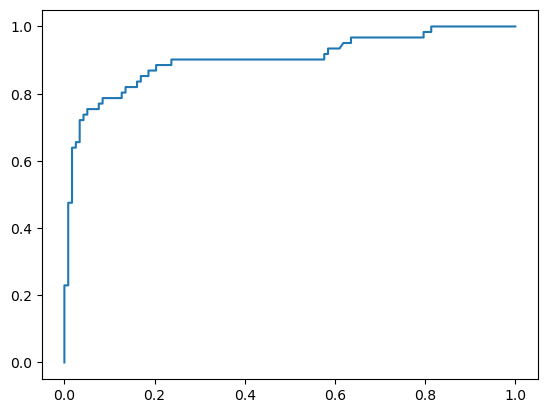

In [ ]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fprs, tprs, threshold = roc_curve(y_test, pred_proba_class1)

# 시각화
plt.plot(fprs, tprs, label = 'ROC')



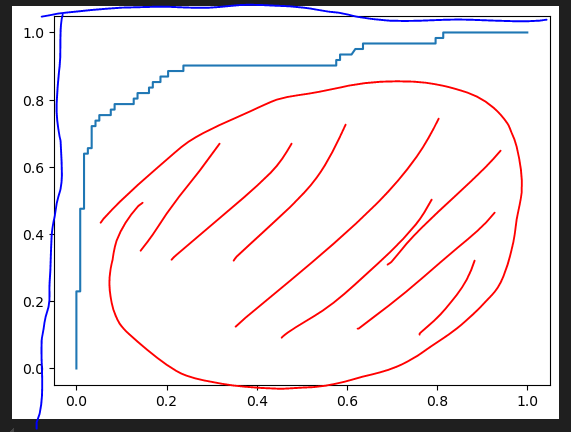
재현율이 어느시점 부터 좋아져서 1에 가까워지는가를 판단하는 것
- ROC
    - 1에 가까울 수록 좋고, Y축 상단에 고정될 수록 좋음(파란색)
    

- AUC의 면적
빨간색 면적에 따라 성능을 측정함

In [81]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, pred_proba_class1)

np.float64(0.9024034454015005)

### 예시
모델1의 ROC-AUC = 0.92  -> "모델의 판별성능이 우수하다"  
모델2의 ROC-AUC = 0.78  

이러면 모델1의 성능이 좋다.